In [38]:
import subprocess
import pandas as pd
import os

In [35]:
for method in ['cascada', 'mcmc', 'hotflip', 'random']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 2)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'

    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

    print(method, ":", result.stdout.decode('utf-8'))

cascada : {'accuracy_drop': 0.041000000000000036, 'probability_drop': 0.03534953742149777, 'WER': 0.731, 'NAD': 0.02918571646732761}

mcmc : {'accuracy_drop': 0.06399999999999995, 'probability_drop': 0.056384669227768115, 'WER': 1.024, 'NAD': 0.06197553502420822}

hotflip : {'accuracy_drop': 0.789, 'probability_drop': 0.6462328299128951, 'WER': 6.472, 'NAD': 0.16620521013092537}

random : {'accuracy_drop': 0.06399999999999995, 'probability_drop': 0.05553518383880777, 'WER': 1.094, 'NAD': 0.06226157614262929}



In [47]:
df = pd.read_csv('data/ag_news/test.csv')

In [78]:
base_dir = 'results/ag_news_results'
for method in ['cascada']:
    xs = os.listdir(os.path.join(base_dir, method))
    x = sorted(xs)[-1]
    res_path = os.path.join(base_dir, method, x, 'results.csv')
    print(res_path)
    res = pd.read_csv(res_path)
    del res['label']
    del res['sequence']
    dfr = res.join(df, how='left')
    dfr.rename(columns={'labels':'label', 'sequences':'sequence'}, inplace=True)
    dfr.to_csv(res_path, index=False)

results/ag_news_results/cascada/20200217_195303/results.csv


In [79]:
for method in ['cascada']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 2)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'

    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

    print(method, ":", result.stdout.decode('utf-8'))

cascada : {'accuracy_drop': 0.721, 'probability_drop': 0.5525898447096369, 'WER': 6.9, 'NAD': 0.14697185761203838}



In [84]:
for method in ['cascada']:

    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 4 | head -n 1)" && python eval.py -mp results/ag_news/logit_tfidf.model -arp ${BASE}/${FOLDER}/results.csv -erp ${BASE}/${FOLDER}/eval_metric.json'
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(method, ":", result.stdout.decode('utf-8'))
    
    cmd = 'BASE="results/ag_news_results/' +  method + '" && FOLDER="$(ls ${BASE} | sort -z | tail -n 4 | head -n 1)" && cat ${BASE}/${FOLDER}/args.json'
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(method, ":", result.stdout.decode('utf-8'))
    
    

cascada : {'accuracy_drop': 0.634, 'probability_drop': 0.49027662298054747, 'WER': 5.289, 'NAD': 0.1522005885049933}

cascada : {
  "cuda": 0,
  "csv_path": "data/ag_news/test.csv",
  "results_path": "results/ag_news_results/cascada",
  "copynet_path": "experiments/ag_news/nonmasked_copynet_with_attention",
  "classifier_path": "experiments/ag_news/classification_copynet",
  "levenshtein_path": "experiments/ag_news/deep_levenshtein_copynet",
  "levenshtein_weight": 0.1,
  "learning_rate": 3.0,
  "max_steps": 30,
  "num_updates": 5,
  "beam_size": 30,
  "maskers": "Identity",
  "early_stopping": false,
  "sample": 1000
}


## make cascada grisearch

In [101]:
levenshtein_weights = [0.1, 1, 10]
beam_sizes = [1, 30, 100]
max_stepss = [5, 30, 100]
learning_rates = [1, 2, 4]

In [102]:
import itertools

In [103]:
params = list(itertools.product(levenshtein_weights, beam_sizes, max_stepss, learning_rates))

In [104]:
len(params)

81

In [107]:
from tqdm import tqdm

In [148]:
os.listdir('data')

['ag_news',
 'ai_academy_data_mini',
 'insurance',
 'ai_academy_data',
 'ag_news_mini',
 'kaggle_transactions']

In [149]:
dataset = 'ai_academy_data'

In [150]:
levenshtein_weight, beam_size, max_steps, learning_rate = 0.1, 5, 5, 2

In [ ]:
for p in tqdm(params):
    print(p)
    levenshtein_weight, beam_size, max_steps, learning_rate = p
    cmd = \
    f'''
    python run_cascada.py 
    --csv_path data/{dataset}/test.csv 
    --results_path results/{dataset}/cascada
    --classifier_path experiments/{dataset}/classification_copynet 
    --levenshtein_path experiments/{dataset}/deep_levenshtein_copynet 
    --copynet_path experiments/{dataset}/nonmasked_copynet_with_attention 
    --levenshtein_weight {levenshtein_weight}
    --beam_size {beam_size} 
    --max_steps {max_steps}
    --cuda 0 
    --num_updates 5 
    --learning_rate {learning_rate} 
    --sample 100
    '''.replace('\n','')
    result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)

  0%|          | 0/81 [00:00<?, ?it/s]

(0.1, 1, 5, 1)


  1%|          | 1/81 [00:10<14:08, 10.61s/it]

(0.1, 1, 5, 2)


  2%|▏         | 2/81 [00:19<13:28, 10.24s/it]

(0.1, 1, 5, 4)


  4%|▎         | 3/81 [00:29<13:12, 10.15s/it]

(0.1, 1, 30, 1)


  5%|▍         | 4/81 [01:09<24:22, 18.99s/it]

(0.1, 1, 30, 2)


  6%|▌         | 5/81 [01:50<32:16, 25.48s/it]

(0.1, 1, 30, 4)


  7%|▋         | 6/81 [02:34<38:47, 31.03s/it]

(0.1, 1, 100, 1)


  9%|▊         | 7/81 [04:35<1:11:30, 57.98s/it]

(0.1, 1, 100, 2)


 10%|▉         | 8/81 [06:38<1:34:36, 77.76s/it]

(0.1, 1, 100, 4)


 11%|█         | 9/81 [08:56<1:54:53, 95.74s/it]

(0.1, 30, 5, 1)


 12%|█▏        | 10/81 [09:08<1:23:26, 70.52s/it]

(0.1, 30, 5, 2)


 14%|█▎        | 11/81 [09:18<1:01:14, 52.50s/it]

(0.1, 30, 5, 4)


 15%|█▍        | 12/81 [09:30<46:08, 40.13s/it]  

(0.1, 30, 30, 1)


 16%|█▌        | 13/81 [10:16<47:40, 42.07s/it]

(0.1, 30, 30, 2)


 17%|█▋        | 14/81 [11:03<48:41, 43.61s/it]

(0.1, 30, 30, 4)


 19%|█▊        | 15/81 [11:55<50:36, 46.01s/it]

(0.1, 30, 100, 1)


 20%|█▉        | 16/81 [14:20<1:22:05, 75.77s/it]

(0.1, 30, 100, 2)


 21%|██        | 17/81 [16:49<1:44:09, 97.64s/it]

(0.1, 30, 100, 4)


 22%|██▏       | 18/81 [19:35<2:04:09, 118.25s/it]

(0.1, 100, 5, 1)


 23%|██▎       | 19/81 [19:48<1:29:40, 86.78s/it] 

(0.1, 100, 5, 2)


 25%|██▍       | 20/81 [20:01<1:05:29, 64.42s/it]

(0.1, 100, 5, 4)


 26%|██▌       | 21/81 [20:14<49:03, 49.05s/it]  

(0.1, 100, 30, 1)


 27%|██▋       | 22/81 [21:10<50:23, 51.25s/it]

(0.1, 100, 30, 2)


 28%|██▊       | 23/81 [22:10<51:50, 53.64s/it]

(0.1, 100, 30, 4)


 30%|██▉       | 24/81 [23:13<53:47, 56.62s/it]

(0.1, 100, 100, 1)


In [158]:
df = pd.read_csv(f'data/{dataset}/test.csv')

In [159]:
base_dir = f'results/{dataset}'
for method in ['cascada']:
    xs = os.listdir(os.path.join(base_dir, method))
    for x in xs:
        if x != 'backup':
            res_path = os.path.join(base_dir, method, x, 'results.csv')
            res_path_backup = res_path.replace('.csv', '_backup.csv')
            if os.path.exists(res_path_backup):
                res = pd.read_csv(res_path_backup)
            else:
                res = pd.read_csv(res_path)
            res.to_csv(res_path.replace('.csv', '_backup.csv'))
            del res['label']
            del res['sequence']
            dfr = res.join(df, how='left')
            dfr.rename(columns={'labels':'label', 'sequences':'sequence'}, inplace=True)
            dfr.to_csv(res_path, index=False)

In [160]:
# for method in ['cascada']:
#     base = os.path.join(base_dir, method)
#     for folder in os.listdir(base):
#         cmd = f'python eval.py -mp {base_dir}/logit_tfidf.model -arp {base}/{folder}/results.csv -erp {base}/{folder}/eval_metric.json'
#         result = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
#         print(method, ":", result.stdout.decode('utf-8'))

In [161]:
from eval import calculate_nad, calculate_metrics
import joblib
import json
from adat.models.classification_model import LogisticRegressionOnTfIdf

In [162]:
model = joblib.load(f'results/{dataset}/logit_tfidf.model')

for method in ['cascada']:
    base = os.path.join(base_dir, method)
    for folder in os.listdir(base):
        if folder != 'backup':
            attack_results_path = f'{base}/{folder}/results.csv'
            eval_results_path = f'{base}/{folder}/eval_metric.json'
            df = pd.read_csv(attack_results_path)
            metrics = calculate_metrics(model, 
                                    df['label'].values, 
                                    df['sequence'].values,
                                    df['generated_sequence'].values)
            json.dump(metrics, open(eval_results_path, 'w'))

In [163]:
result = []
for method in ['cascada']:
    base = os.path.join(base_dir, method)
    for folder in os.listdir(base):
        if folder != 'backup':
            args = json.load(open(os.path.join(base, folder, 'args.json')))
            metrics = json.load(open(os.path.join(base, folder, 'eval_metric.json')))
            args.update(metrics)
            result.append({k:args[k] for k in ['accuracy_drop', 'probability_drop', 'WER', 'NAD',
                                               'levenshtein_weight', 'beam_size', 'max_steps', 'learning_rate']})
result = pd.DataFrame(result)

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
result

,accuracy_drop,probability_drop,WER,NAD,levenshtein_weight,beam_size,max_steps,learning_rate
0,0.31,0.157262,6.04,0.135493,0.1,1,5,4.0
1,0.09,0.034056,0.78,0.069990,1.0,100,30,2.0
2,0.04,0.010940,0.47,0.076389,0.1,1,30,1.0
3,0.10,0.039502,0.90,0.078804,1.0,30,100,2.0
4,0.30,0.127038,4.14,0.174272,10.0,30,30,4.0
...,...,...,...,...,...,...,...,...
77,0.12,0.042081,0.93,0.076562,0.1,30,100,2.0
78,0.12,0.039696,0.84,0.079365,0.1,100,30,2.0
79,0.11,0.041819,1.02,0.070412,1.0,30,5,2.0
80,0.00,-0.001689,0.09,0.000000,10.0,100,100,1.0


In [166]:
sns.set()

In [167]:
base_dir

'results/ai_academy_data'

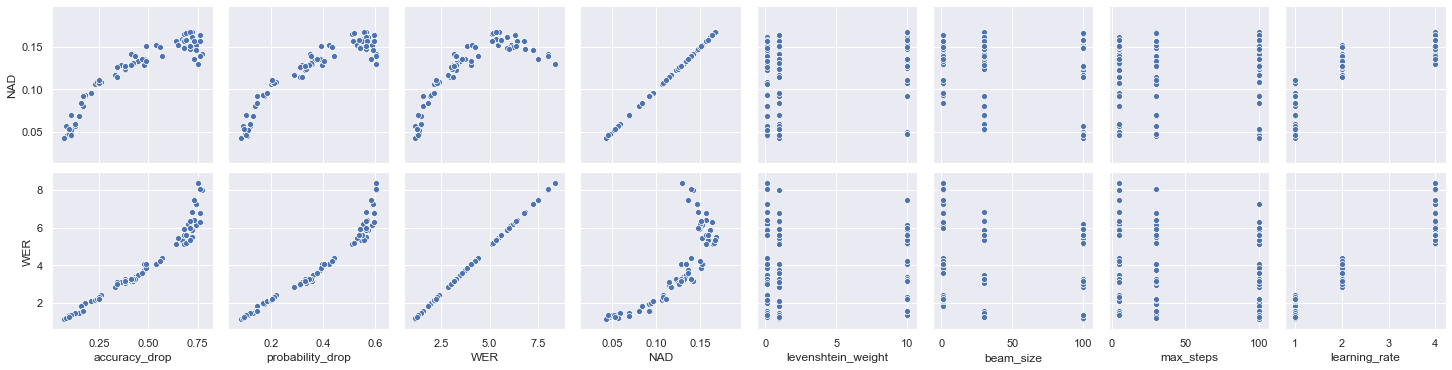

In [144]:
g = sns.pairplot(result, x_vars=result.columns.values, y_vars=['NAD', 'WER'])
plt.savefig(os.path.join(base_dir, 'stats.png'), dpi=150, bbox_inches='tight')

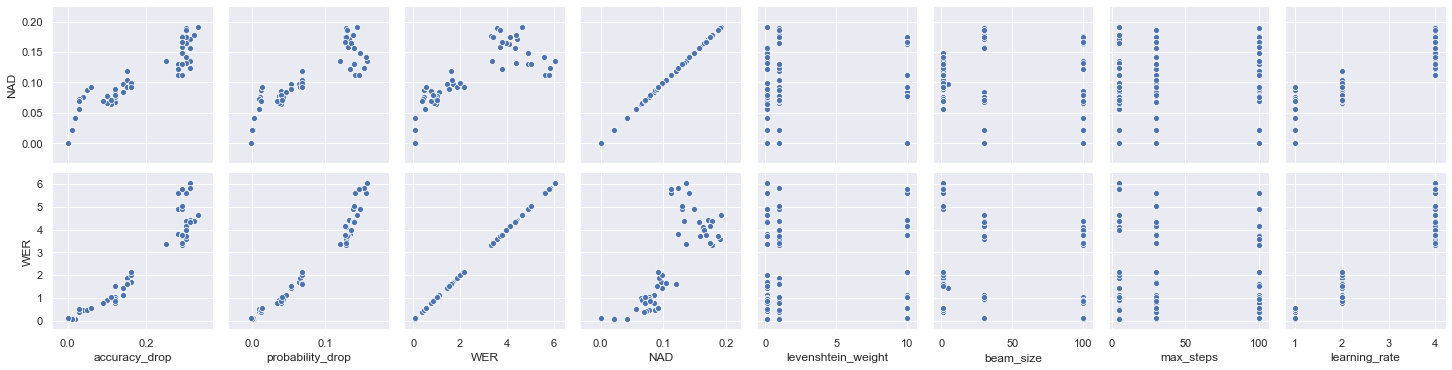

In [168]:
g = sns.pairplot(result, x_vars=result.columns.values, y_vars=['NAD', 'WER'])
plt.savefig(os.path.join(base_dir, 'stats.png'), dpi=150, bbox_inches='tight')

In [169]:
result.sort_values(by='NAD', ascending=False)

,accuracy_drop,probability_drop,WER,NAD,levenshtein_weight,beam_size,max_steps,learning_rate
24,0.33,0.144403,4.65,0.191789,0.1,30,5,4.0
60,0.30,0.129233,3.59,0.189817,1.0,30,100,4.0
64,0.30,0.130281,3.72,0.186568,1.0,30,30,4.0
38,0.32,0.138436,4.37,0.178185,1.0,30,5,4.0
31,0.29,0.128600,3.31,0.177271,1.0,100,100,4.0
...,...,...,...,...,...,...,...,...
63,0.00,-0.001689,0.09,0.000000,10.0,100,30,1.0
40,0.00,-0.001405,0.11,0.000000,10.0,30,30,1.0
15,0.00,-0.001405,0.11,0.000000,0.1,30,5,1.0
22,0.00,-0.001934,0.08,0.000000,0.1,100,5,1.0


In [146]:
result.sort_values(by='NAD', ascending=False)

,accuracy_drop,probability_drop,WER,NAD,levenshtein_weight,beam_size,max_steps,learning_rate
33,0.72,0.566426,5.50,0.167528,10.0,30,30,4.0
51,0.71,0.557898,5.33,0.166994,10.0,30,100,4.0
48,0.69,0.518521,5.18,0.165818,10.0,100,30,4.0
23,0.68,0.512057,5.13,0.164493,10.0,100,100,4.0
58,0.76,0.596435,6.32,0.163406,1.0,1,100,4.0
...,...,...,...,...,...,...,...,...
40,0.10,0.101674,1.34,0.047287,10.0,100,30,1.0
19,0.09,0.100596,1.25,0.046512,0.1,100,100,1.0
69,0.11,0.105858,1.33,0.045930,1.0,100,5,1.0
16,0.11,0.109903,1.30,0.044961,0.1,100,30,1.0


In [171]:
cmd = f"""
    python run_hotflip.py 
    --csv_path data/{dataset}/test.csv 
    --results_path results/{dataset}/hotflip
    --classifier_path experiments/{dataset}/classifier_basic 
    --sample 100
    """.replace('\n','')

In [172]:
cmd

'    python run_hotflip.py     --csv_path data/ai_academy_data/test.csv     --results_path results/ai_academy_data/hotflip    --classifier_path experiments/ai_academy_data/classifier_basic     --sample 100    '

In [181]:

testdf = pd.read_csv(f'data/{dataset}/test.csv')
for method in ['hotflip']:
    base = os.path.join(base_dir, method)    
    for folder in os.listdir(base):
        if folder != 'backup':
            attack_results_path = f'{base}/{folder}/results.csv'
            eval_results_path = f'{base}/{folder}/eval_metric.json'
            df = pd.read_csv(attack_results_path)
            df = df.join(testdf, how='left').rename(columns={'sequences':'sequence', 'labels':'label'})
            metrics = calculate_metrics(model, 
                                    df['label'].values, 
                                    df['sequence'].values,
                                    df['generated_sequence'].values)
            json.dump(metrics, open(eval_results_path, 'w'))

In [186]:
metrics

{'accuracy_drop': 0.37,
 'probability_drop': 0.2128507382176137,
 'WER': 8.77,
 'NAD': 0.11758477206551106}

In [184]:
ag_news = json.load(open('results/ag_news_results/hotflip/20200217_084324/eval_metric.json', 'r'))

In [185]:
ag_news

{'accuracy_drop': 0.789,
 'probability_drop': 0.6462328299128951,
 'WER': 6.472,
 'NAD': 0.16620521013092537}